# COVID-19 a Corea del Sud

## Llibreries necessàries per corre el codi

In [159]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from IPython.display import IFrame

## Els datasets que utilitzarem

In [160]:
patient = pd.read_csv("./Data/PatientInfo.csv")
region = pd.read_csv("./Data/Region.csv")

Aprofitem els atributs província i ciutat per ajuntar els dos datasets. D’aquesta manera podrem saber a on es va detectar la infecció. 

In [161]:
data = pd.merge(patient, region, how='inner', left_on=['province', 'city'], right_on=['province', 'city'])

In [162]:
data.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,...,code,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,...,10040,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080
1,1000000027,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,NaN,NaN,...,10040,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080
2,1000000106,male,30s,Korea,Seoul,Gangseo-gu,contact with patient,NaN,NaN,NaN,...,10040,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080
3,1000000144,female,40s,Korea,Seoul,Gangseo-gu,Guro-gu Call Center,NaN,NaN,NaN,...,10040,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080
4,1000000150,female,60s,Korea,Seoul,Gangseo-gu,Guro-gu Call Center,NaN,NaN,NaN,...,10040,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080


### Selecció dels atributs que ens interessen

In [163]:
# Convertim els atributs a tipus datetime
data['Date_Conf'] = pd.to_datetime(data['confirmed_date'])
data['Date_Recovered'] = pd.to_datetime(data['released_date'])

# Podem calcular els dies que va necessitar el pacient per recuperar-se
data['Days_To_Recover'] = (data['Date_Recovered'] - data['Date_Conf']).dt.days

# Seleccionem els atributs que ens interessen i els ordenem
data_int_atr = data.iloc[:, [0, 1, 5, 6, 7, 8, 2, 24, 25, 26, 15, 16]].copy()

# Els valors buits els substituïm per NA.
data_int_atr['sex'].replace('', pd.NA, inplace=True)
data_int_atr['infection_case'].replace('', pd.NA, inplace=True)

# Re-anomenem els atributs per a una millor comprensió.
data_int_atr.columns = ["ID", "Sex", "Region", "Infection_reason", "Infected_by", "Contact_number", "Age", "Date_Confirm", "Date_Recovered", "Days_To_Recover", "Latitude", "Longitude"]

In [164]:
data.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,...,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count,Date_Conf,Date_Recovered,Days_To_Recover
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,...,36,56,1,1.17,14.39,5.7,1080,2020-01-23,2020-02-05,13.0
1,1000000027,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,NaN,NaN,...,36,56,1,1.17,14.39,5.7,1080,2020-02-23,2020-03-04,10.0
2,1000000106,male,30s,Korea,Seoul,Gangseo-gu,contact with patient,NaN,NaN,NaN,...,36,56,1,1.17,14.39,5.7,1080,2020-03-06,NaT,NaN
3,1000000144,female,40s,Korea,Seoul,Gangseo-gu,Guro-gu Call Center,NaN,NaN,NaN,...,36,56,1,1.17,14.39,5.7,1080,2020-03-09,NaT,NaN
4,1000000150,female,60s,Korea,Seoul,Gangseo-gu,Guro-gu Call Center,NaN,NaN,NaN,...,36,56,1,1.17,14.39,5.7,1080,2020-03-09,NaT,NaN


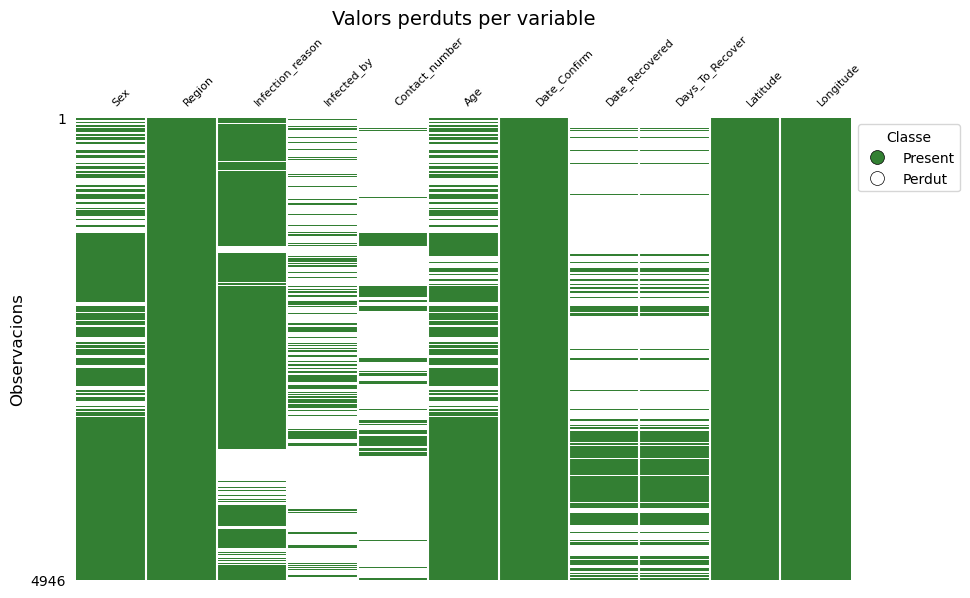

In [168]:
# Excloem la variable ID
data_subset = data_int_atr.iloc[:, 1:]

# Color
color_present = (0.2, 0.5, 0.2)  # Green

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
msno.matrix(data_subset, ax=ax, fontsize=8, labels=True, sparkline=False, color=color_present)
plt.title("Valors perduts per variable", fontsize=14)
plt.ylabel("Observacions", fontsize=12)

# Llegenda
legend_labels = ['Present', 'Perdut']
legend_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_present, markersize=10, markeredgewidth=0.5, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='white', markersize=10, markeredgewidth=0.5, markeredgecolor='black')
]
plt.legend(legend_handles, legend_labels, title='Classe', loc='upper right', bbox_to_anchor=(1.15, 1))

plt.show()


Les variables **Infected_by**, **Contact_number**, **Date_Recovered** i **Days_To_Recoverer** tenen bastants valors perduts. **Sex**, **Infection_reason** i **Age** gran part dels registres tenen valors. Aquests atributs els podrem utilitzar assumint que hi ha una petita pèrdua d’informació. Pel que fa a les característiques restants, quasi totes les observacions tenen un valor. Per aquest motiu en el següent gràfic farem servir **Latitude** i **Longitude**. 

### Exportem el dataset

In [99]:
data_int_atr.to_csv('patientLatLon.csv', index=False)

Hem exportat el joc de dades amb el que hem treballat. D’aquesta manera podem utilitzar-lo per a crear un Heatmap en 3D sobre la localització de Corea del Sud.

## Pregunta

En tots aquests datasets una de les coses que més m’ha cridat l’atenció és, poder localitzar cada cas de pacient contagiat en un punt concret, sense pèrdua d’informació, ja que totes les observacions tenen valors de latitud i longitud. I que gran part dels registres tenen el motiu d’infecció. Tot i això crec que ens faltaria més informació per a determinar una resposta clara a la pregunta de: **Com va ser la transmissió de COVID-19 a Corea del Sud?**

### 3D Heatmap utilitzant Flourish

In [110]:
IFrame("https://public.flourish.studio/visualisation/16461514/", width="100%", height=650)

Podem veure com tot va començar a la zona nord del país i ràpidament es va expandir per tot ell. On òbviament les zones de màxima població van ser les més afectades. Però com es van produir aquestes transmissions? Hem vist les transmissions al llarg del primer semestre i com es propaguen geogràficament, però podem trobar-hi algun motiu? Doncs ara anem a veure quina informació ens dona la variable **Infection_reason**.

**Transformem les dades, agafem les 15 categories més freqüents i exportem les dades**

In [104]:
# Creem una variable amb la freqüència de cada categoria de la variable
cases = data_int_atr['Infection_reason'].value_counts().head(15).reset_index()
cases.columns = ['Infection reason', 'Count']

cases.to_csv('cases.csv', index=False)

### Bar Chart utilitzant Flourish

In [109]:
IFrame("https://public.flourish.studio/visualisation/16463510/", width="100%", height=900)

Podem veure que hi ha tres valors que són clarament més freqüents que els altres. Però els valors que ens interessen són tots excepte **contact with patient** i **etc**. El primer perquè no ens aporta una informació de la localització o en quin lloc es pot haver produït. I ara mateix és el que ens interessa per a fer suposicions. **etc** fa referència a aquells casos en procés de determinar o casos individuals.<br><br>
Hem vist en quints esdeveniments hi ha hagut una transmissió de COVID-19 alta, però en quin moment s’ha produït? Ja que no és el mateix que fos al principi de la pandèmia que al final. Per a la nostra pregunta ens interessa saber com va començar tot.

#### Transformem les dades

Per a poder fer un gràfic de com les transmissions van succeint al llarg del temps, necessitem transformar una mica el dataset. Per a fer això, crearem una columna per a cada categoria de la variable **Infection_reason**. I cada observació seria un dia, començant pel primer cas, fins a finals de Juny. A més, hi haurà el total d’infeccions per cada dia.

In [169]:
# Ordanem per data
data_int_atr_sorted_date = data_int_atr.sort_values(by='Date_Confirm')
data_int_atr_sorted_date['Count'] = 1

# Transformem el joc de dades. Creem una columna per a cada categoria
pivot_table = data_int_atr_sorted_date.pivot_table(index='Date_Confirm', columns='Infection_reason', values='Count', aggfunc='sum', fill_value=0)
pivot_table['Total'] = pivot_table.sum(axis=1)

selected_columns =  ['overseas inflow', 'Itaewon Clubs', 'Richway', 'Guro-gu Call Center', 'Shincheonji Church', 'Total']
pivot_table = pivot_table[selected_columns]

### Line Chart utilitzant matplotlib

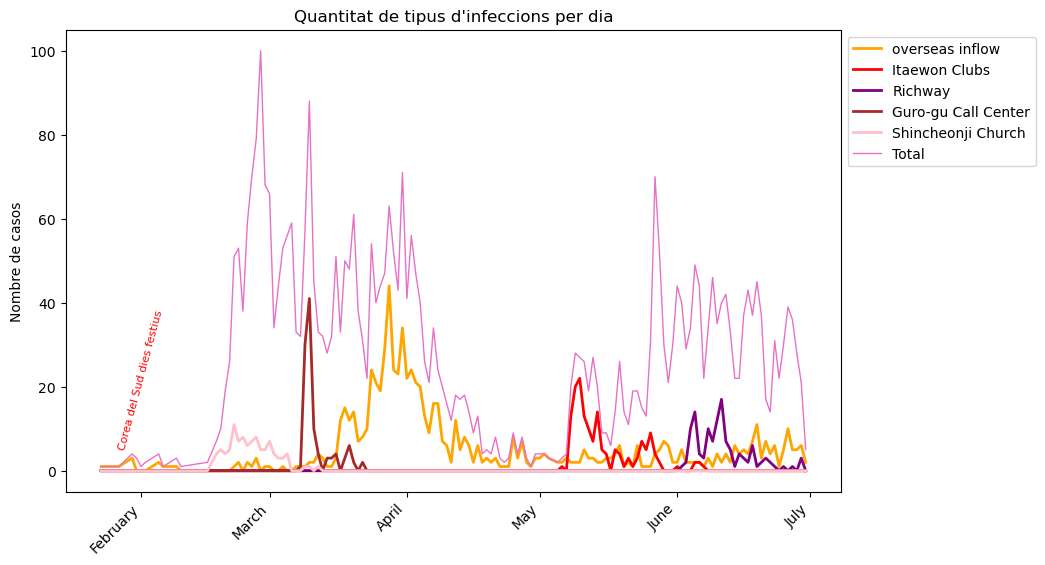

In [170]:
pivot_table.index = pd.to_datetime(pivot_table.index)

# Colors
plot_settings = {
    'Total': {'color': '#e770c8', 'linewidth': 1},
    'overseas inflow': {'color': 'orange', 'linewidth': 2},
    'Itaewon Clubs': {'color': 'red', 'linewidth': 2},
    'Richway': {'color': 'purple', 'linewidth': 2},
    'Guro-gu Call Center': {'color': 'brown', 'linewidth': 2},
    'Shincheonji Church': {'color': 'pink', 'linewidth': 2},
}

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
for column in pivot_table.columns:
    settings = plot_settings.get(column, {})
    ax.plot(pivot_table.index, pivot_table[column], label=column, color=settings.get('color', 'blue'), linewidth=settings.get('linewidth', 1))

# Labels i títol
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_ylabel('Nombre de casos')
ax.set_title("Quantitat de tipus d'infeccions per dia")

# Mesos
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))
plt.xticks(rotation=45, ha='right')

# Etiqueta
ax.text(pd.Timestamp('2020-02-01'), 0.05 * ax.get_ylim()[1], 'Corea del Sud dies festius', ha='center', fontsize=8, color='red', rotation=75)

plt.show()

Podem veure que a mitjans de Febrer la transmissió del COVID-19 va començar a créixer. En aquell moment els principals casos eren els de persones que venien de fora. Just per aquelles dates del 2020 es donava el nou any Corea. Per aquelles festivitats hi ha grans reunions i celebracions, per tant, era d’esperar un augment de les transmissions. Tot i això, l’esdeveniment més determinant va ser a l’església Shincheonji. Tot i que ocupava el lloc número 7 en el gràfic de barres, va ser un esdeveniment important en la transmissió de la COVID-19 a Corea del Sud. Un altre esdeveniment important és el que es dona a principis de Maig. Que ja començaven a baixar el nombre de casos, però hi ha un repunt arrel dels contagis al club Itaewon.

### Heatmap utilitzant matplotlib

Hem vist com s’ha pogut produir, els possibles motius. Però qui? Ara utilitzarem l’atribut **Age** per estimar una mica, quina franja d’edat és la que pot haver sigut la principal “responsable” de la transmissió. Cal tenir present dues coses, per una banda, hi ha una petita pèrdua d’informació per a la característica en qüestió. I en segon lloc, seria interessant saber el ratio de l’edat. És a dir, probablement les franges d’edat del mig mostren més casos, ja que també són la franja més amplia de la població. No esperem trobar molts casos en la tercera edat, per aquest motiu seria interessant fer la ràtio respecte la població d’aquell moment. Tot i això, anem a veure que ens mostren les dades:

### Heatmap utilitzant matplotlib

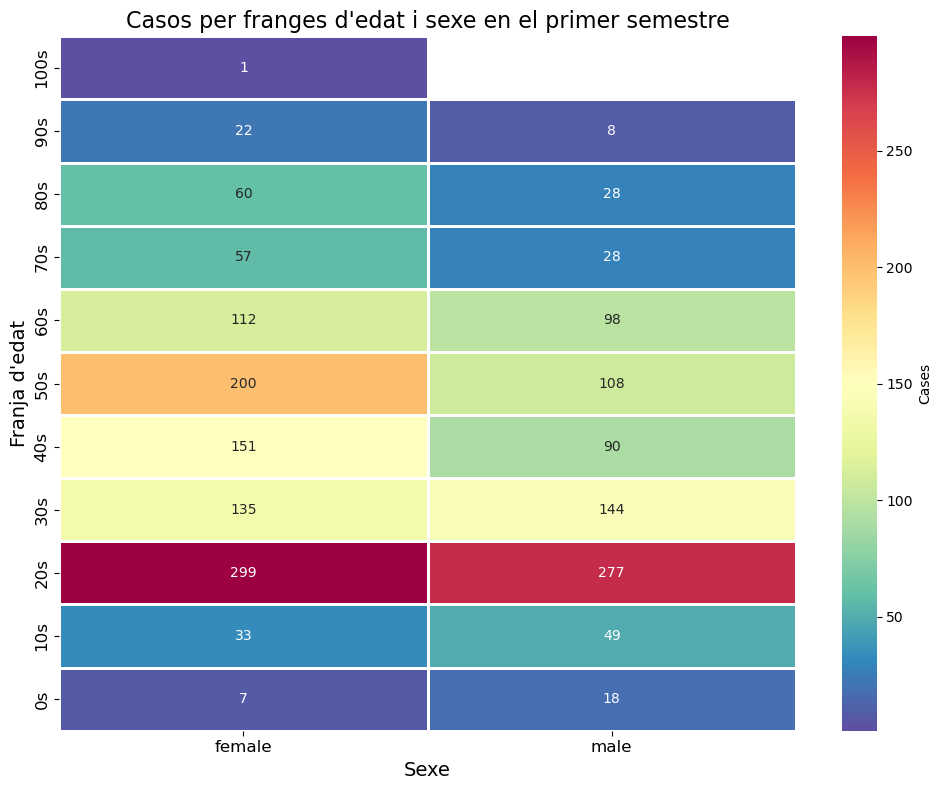

In [171]:
data_chart_age = data_int_atr[data_int_atr['Age'] != ""]
data_chart_age = data_chart_age.dropna(subset=['Sex'])

# Eliminem aquelles casos que no ens interessa, ja que busquem un esdeveniment.
data_chart_age = data_chart_age[~data_chart_age['Infection_reason'].isin(['contact with patient', 'etc'])]

# Agrupem per Sex i Age i comptem
data_chart_age = data_chart_age.groupby(['Age', 'Sex']).size().reset_index(name='Count')
data_chart_age_pivot = data_chart_age.pivot(index='Age', columns='Sex', values='Count')

# Ordenem les franges d'edat
age_order = ["100s", "90s", "80s", "70s", "60s", "50s", "40s", "30s", "20s", "10s", "0s"]
data_chart_age_pivot = data_chart_age_pivot.reindex(age_order)

# Plot 
plt.figure(figsize=(10, 8))
sns.heatmap(data_chart_age_pivot, cmap='Spectral_r', linewidths=1, annot=True, fmt='.0f', cbar_kws={'label': 'Cases'})

# Labels i títol
plt.title("Casos per franges d'edat i sexe en el primer semestre", fontsize=16)
plt.xlabel("Sexe", fontsize=14)
plt.ylabel("Franja d'edat", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

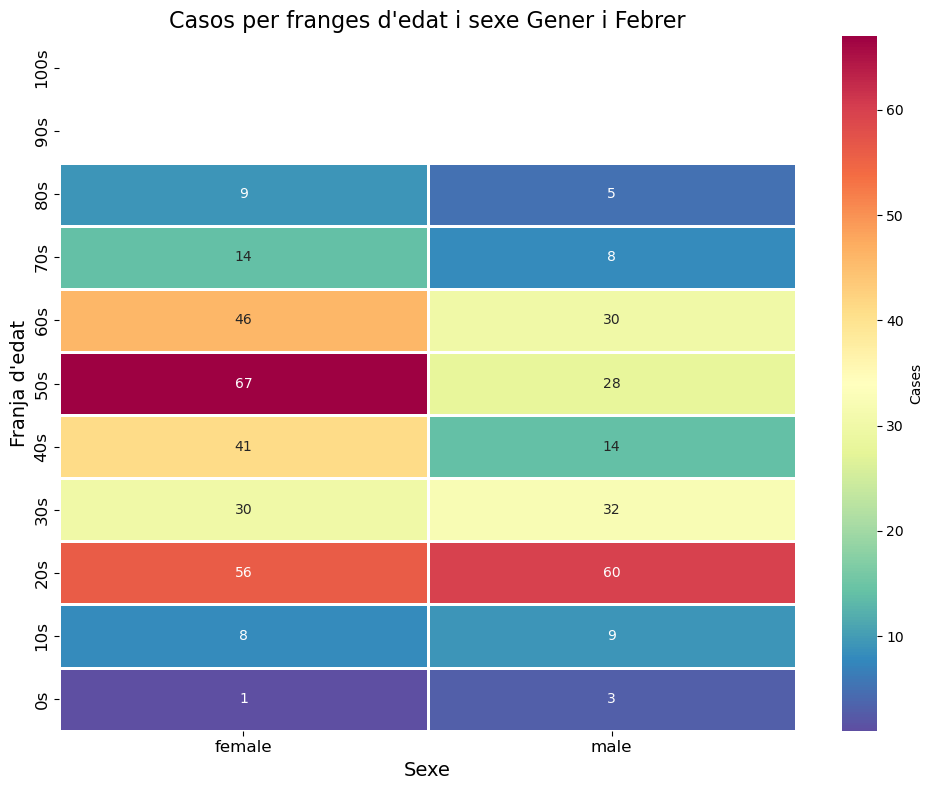

In [174]:
# Filtrem pels primers dos mesos
data_chart_age_fil = data_int_atr[(data_int_atr['Date_Confirm'] >= '2020-01-01') & (data_int_atr['Date_Confirm'] <= '2020-02-29')]

# Eliminem aquelles casos que no ens interessa, ja que busquem un esdeveniment.
data_chart_age_fil = data_chart_age_fil[~data_chart_age_fil['Infection_reason'].isin(['contact with patient', 'etc'])]

# Agrupem per Sex i Age i comptem
data_chart_age_fil = data_chart_age_fil.groupby(['Age', 'Sex']).size().reset_index(name='Count')
data_chart_age_pivot_fil = data_chart_age_fil.pivot(index='Age', columns='Sex', values='Count')

# Ordenem les franges d'edat
age_order = ["100s", "90s", "80s", "70s", "60s", "50s", "40s", "30s", "20s", "10s", "0s"]
data_chart_age_pivot_fil = data_chart_age_pivot_fil.reindex(age_order)

# Plot 
plt.figure(figsize=(10, 8))
sns.heatmap(data_chart_age_pivot_fil, cmap='Spectral_r', linewidths=1, annot=True, fmt='.0f', cbar_kws={'label': 'Cases'})

# Labels i títol
plt.title("Casos per franges d'edat i sexe Gener i Febrer", fontsize=16)
plt.xlabel("Sexe", fontsize=14)
plt.ylabel("Franja d'edat", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()